In [0]:
pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8MB 42kB/s 
     |████████████████████████████████| 3.8MB 49.2MB/s 
     |████████████████████████████████| 450kB 53.2MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
path = '/content/drive/My Drive/fer2013_data/fer2013.csv'
df = pd.read_csv(path)

In [0]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [0]:
print(df['pixels'].head(1))

0    70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
Name: pixels, dtype: object


In [0]:
df['Usage'].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
emotion    35887 non-null int64
pixels     35887 non-null object
Usage      35887 non-null object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [0]:
x_train, y_train, x_test, y_test = [],[],[],[]

In [0]:
for index, row in df.iterrows():
  val = row['pixels'].split(" ")  #pixels are separated by space so split garera val ma rakhne
  if 'Training' in row['Usage']:  # yadi 'Training' vayema
    x_train.append(np.array(val,'float32')) # val lai np array banayera store garne x_train ma
    y_train.append(row['emotion'])  # ani lables i.e 'emotion' lai store garne

  elif 'PublicTest' in row['Usage']:
    x_test.append(np.array(val,'float32'))
    y_test.append(row['emotion'])

In [0]:
len(x_train), len(y_train)

(28709, 28709)

In [0]:
x_train[1]

array([151., 150., 147., ..., 193., 183., 184.], dtype=float32)

In [0]:
x_train[0:2]

[array([ 70.,  80.,  82., ..., 106., 109.,  82.], dtype=float32),
 array([151., 150., 147., ..., 193., 183., 184.], dtype=float32)]

In [0]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [0]:
x_train -= np.mean(x_train,axis = 0) 
x_train /= np.std(x_train,axis = 0)

x_test -= np.mean(x_test,axis = 0) 
x_test /= np.std(x_test,axis = 0)



In [0]:
x_train[0]

array([-0.6098866 , -0.4592209 , -0.40325198, ..., -0.08629682,
       -0.0573744 , -0.41127437], dtype=float32)

In [0]:
x_test

array([[ 1.6505896 ,  1.7122597 ,  1.774942  , ..., -0.9225547 ,
         0.18117245,  0.80417955],
       [ 0.45219082,  0.84190166,  1.0658671 , ...,  0.73589116,
         0.6640275 ,  0.5656745 ],
       [-0.6116937 ,  0.02127829, -0.6688345 , ..., -0.33572   ,
        -0.35250947, -0.32558146],
       ...,
       [ 1.6628181 ,  1.7246933 ,  1.7876041 , ..., -0.84601104,
        -0.8226578 , -0.87790906],
       [-1.0519217 , -1.1350546 , -1.0486962 , ..., -1.4073311 ,
        -1.3944598 , -1.4051309 ],
       [-0.7095221 , -0.66257447, -0.6941586 , ..., -0.01678811,
         0.6386141 ,  0.80417955]], dtype=float32)

In [0]:
x_train.shape

(28709, 2304)

In [0]:
x_train[0].shape[0]

2304

In [0]:
48*48

2304

In [0]:
x_train = x_train.reshape(x_train.shape[0],48,48,1) # 48*48 = 2304 , reshape gareko 48/48 dim
x_test = x_test.reshape(x_test.shape[0],48,48,1)

In [0]:
x_train.shape

(28709, 48, 48, 1)

In [0]:
x_test.shape

(3589, 48, 48, 1)

In [0]:
from keras.regularizers import l2
from tensorflow.keras.layers import MaxPooling2D

Using TensorFlow backend.


this model is inspired from https://www.freecodecamp.org/news/facial-emotion-recognition-develop-a-c-n-n-and-break-into-kaggle-top-10-f618c024faa7/ blog. This model took hell lot of time so I am not training with this model.

In [0]:
# model = Sequential()

# model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1), kernel_regularizer=l2(0.01)))
# model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
# model.add(Dropout(0.5))  

# # model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
# # model.add(BatchNormalization())

# # model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
# # model.add(BatchNormalization())

# model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.5)) 

# # model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
# # model.add(BatchNormalization())

# model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
# model.add(BatchNormalization())

# model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.5))  

# # model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
# # model.add(BatchNormalization())
# # model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
# # model.add(BatchNormalization())

# model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.5))  

# model.add(Flatten())
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.5))

# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))

# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))

# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))

# model.add(Dense(7, activation='softmax'))

I have commented those out coz it took a hell lot of time to train. I will use the next model

In [0]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1), kernel_regularizer=l2(0.01)))
model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.3)) 

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3)) 

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))  

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))

model.add(Dense(7, activation='softmax'))

In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, TensorBoard, ModelCheckpoint

In [0]:
lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=3)
early_stopper = EarlyStopping(monitor='val_acc', min_delta=0, patience=6, mode='auto')
checkpointer = ModelCheckpoint('/content/gdrive/My Drive/fer2013_data/weights.hd5', monitor='val_loss', verbose=1, save_best_only=True)

1. ReduceLROnPlateau => Training a neural network can plateau at times and we stop seeing any progress during this stage. Therefore, this function monitors the validation loss for signs of a plateau and then alter the learning rate by the specified factor if a plateau is detected.

2. EarlyStopping => At times, the progress stalls while training a neural network and we stop seeing any improvement in the validation accuracy. This function waits for a specified number of epochs and terminates the training if no change in the parameter is found.

3. ModelCheckpoint => It saves your model after every epoch. In case your training stops you can load the checkpoint and resume the process.


In our case, it seems like ModelCheckpoint is bringing error:-
AttributeError: module 'tensorflow' has no attribute 'get_default_session'. I guessed it because the error occured after the completion of 'one' epoch and ModelCheckpoint saves model after one epoch. So I am removing this. It is removed from 'callback' tuple of model.fit and can be added inside the bracket if necessary.

So again I tried implementing the training without using ModelCheckpoint but the error still occured after one epoch so I am removing whole callback parameter from the model.fit.

In [0]:
from keras.utils import to_categorical

In [0]:
y_train = to_categorical(y_train,num_classes= 7)
y_test = to_categorical(y_test,num_classes= 7)


In [0]:
x_train.shape,y_train.shape

((28709, 48, 48, 1), (28709, 7))

In [0]:
x_test.shape,y_test.shape

((3589, 48, 48, 1), (3589, 7))

In [0]:
history = model.fit(x_train,y_train,batch_size=32,epochs=30,validation_split=0.2,shuffle=True )
# model.save('/content/gdrive/My Drive/fer2013_data/emotion_model.hd5')

Train on 22967 samples, validate on 5742 samples
Epoch 1/30
22967/22967 [==============================] - 885s 39ms/sample - loss: 1.8874 - accuracy: 0.2288 - val_loss: 1.8219 - val_accuracy: 0.2517
Epoch 2/30
22967/22967 [==============================] - 881s 38ms/sample - loss: 1.7612 - accuracy: 0.2760 - val_loss: 1.6905 - val_accuracy: 0.3114
Epoch 3/30
22967/22967 [==============================] - 877s 38ms/sample - loss: 1.6269 - accuracy: 0.3431 - val_loss: 1.4935 - val_accuracy: 0.3922
Epoch 4/30
22967/22967 [==============================] - 873s 38ms/sample - loss: 1.5048 - accuracy: 0.4060 - val_loss: 1.3767 - val_accuracy: 0.4591
Epoch 5/30
22967/22967 [==============================] - 872s 38ms/sample - loss: 1.4355 - accuracy: 0.4388 - val_loss: 1.3927 - val_accuracy: 0.4589
Epoch 6/30
22967/22967 [==============================] - 877s 38ms/sample - loss: 1.3822 - accuracy: 0.4639 - val_loss: 1.3073 - val_accuracy: 0.4981
Epoch 7/30
22967/22967 [=====================

In [0]:
model.save('facial_recognition.h5')

In [0]:
def plot_curve(history):
  epoch_range =range(1,31)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title("Model_Accuracy")
  
  plt.ylabel("accuracy")
  plt.xlabel("epoch")
  plt.legend(['train','val'], loc = "upper left")
  plt.show()

  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title("Model_loss")
  
  plt.ylabel("loss")
  plt.xlabel("epoch")
  plt.legend(['train','val'], loc = "upper right")
  plt.show()

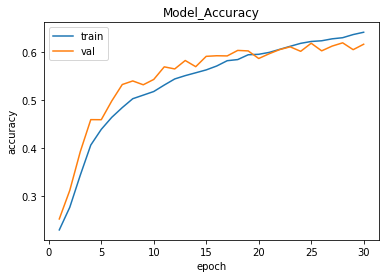

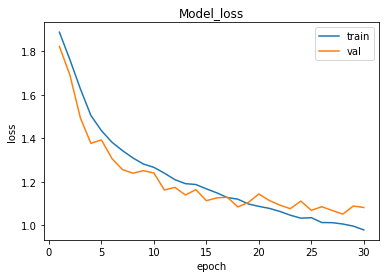

In [0]:
plot_curve(history)